<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from joblib import dump
from sklearn.linear_model import LogisticRegression 
import numpy as np
from scipy import stats as st
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")


In [2]:
train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv', parse_dates = ['date'])
test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv', parse_dates = ['date'])
full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv', parse_dates = ['date'])



In [3]:
print(full_data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19438 non-null  float64       
 2   final.output.concentrate_pb                         19438 non-null  float64       
 3   final.output.concentrate_sol                        19228 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19438 non-null  float64       
 7   final.output.tail_pb                                19338 non-null  float64       
 8   final.

In [4]:
print(train_data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14148 non-null  float64       
 2   final.output.concentrate_pb                         14148 non-null  float64       
 3   final.output.concentrate_sol                        13938 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14049 non-null  float64       
 8   final.

In [5]:
print(test_data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5286 non-null   float64       
 2   primary_cleaner.input.depressant            5285 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5286 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

 в таблицах train_data и full_data по 86 столбцов, а в test_data 52 столбца. Причем столбцов эффективность обогащения чернового концентрата rougher.output.recovery и эффективность обогащения финального концентрата final.output.recovery в тестовой таблице также нет. 

In [6]:
print(train_data.describe()) 

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 14148.000000                 14148.000000   
mean                      5.142034                    10.132960   
std                       1.369586                     1.654930   
min                       0.000000                     0.000000   
25%                       4.211620                     9.297355   
50%                       4.994652                    10.297144   
75%                       5.859540                    11.170603   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  13938.000000                 14149.000000   
mean                       9.202849                    44.003792   
std                        2.790516                     4.905261   
min                        0.000000                     0.000000   
25%                        7.484645                    4

In [7]:
print(test_data.describe()) 

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                    5286.000000                       5285.000000   
mean                      174.839652                          8.683596   
std                        43.027080                          3.072050   
min                         2.566156                          0.003839   
25%                       147.121401                          6.489555   
50%                       177.828489                          8.052207   
75%                       208.125438                         10.027764   
max                       265.983123                         40.000000   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                      5290.000000                     5286.000000   
mean                          7.266339                        1.383803   
std                           0.610219                        0.643474   
min                           5.65000

In [8]:
print(full_data.describe()) 

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 19438.000000                 19438.000000   
mean                      5.168470                     9.978895   
std                       1.372348                     1.669240   
min                       0.000000                     0.000000   
25%                       4.251240                     9.137262   
50%                       5.066094                    10.102433   
75%                       5.895527                    11.035769   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  19228.000000                 19439.000000   
mean                       9.501224                    44.076513   
std                        2.787537                     5.129784   
min                        0.000000                     0.000000   
25%                        7.722820                    4

In [9]:
full_data.duplicated().sum()

0

In [10]:
train_data.duplicated().sum()

0

In [11]:
test_data.duplicated().sum()

0

Дубликатов нет

In [12]:
full_data.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
date,0.00%
rougher.output.concentrate_pb,0.00%
rougher.state.floatbank10_f_level,0.00%
rougher.state.floatbank10_f_air,0.00%
rougher.state.floatbank10_e_level,0.00%
rougher.state.floatbank10_d_level,0.00%
rougher.state.floatbank10_d_air,0.00%
secondary_cleaner.output.tail_au,0.00%
rougher.calculation.au_pb_ratio,0.00%
rougher.output.tail_au,0.00%


In [13]:
train_data.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
date,0.00%
rougher.output.concentrate_pb,0.00%
rougher.state.floatbank10_f_level,0.00%
rougher.state.floatbank10_f_air,0.00%
rougher.state.floatbank10_e_level,0.00%
rougher.state.floatbank10_d_level,0.00%
rougher.state.floatbank10_d_air,0.00%
primary_cleaner.output.tail_au,0.00%
rougher.calculation.au_pb_ratio,0.00%
rougher.output.tail_au,0.00%


In [14]:
test_data.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
date,0.00%
rougher.state.floatbank10_c_air,0.00%
rougher.state.floatbank10_c_level,0.00%
rougher.state.floatbank10_d_air,0.00%
rougher.state.floatbank10_d_level,0.00%
rougher.state.floatbank10_e_air,0.00%
rougher.state.floatbank10_e_level,0.00%
rougher.state.floatbank10_f_air,0.00%
rougher.state.floatbank10_f_level,0.00%
secondary_cleaner.state.floatbank2_a_level,0.00%


 В тестовой выборке некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Из  86 столбцов общей выборки в тестовой есть 52 значит на 34 столбца меньше.

Проверим, что эффективность обогащения рассчитана правильно. По условиям задачи вычислять будем на обучающей выборке для признака rougher.output.recovery

recovery = ((C * (F-T))  /( F * (C-T)))*100%

где:
C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.

In [15]:
C = train_data['rougher.output.concentrate_au']
F = train_data['rougher.input.feed_au']
T = train_data['rougher.output.tail_au']
recovery = ((C * (F-T))  /( F * (C-T)))*100

print('MAE -', mean_absolute_error(train_data['rougher.output.recovery'],  recovery))

MAE - 9.73512347450521e-15


MAE имеет очень малое отклонение - это значит, что расчетное значение rougher.output.recovery совпадает с истинными значениями.

Проведем предобработку данных:
1. Удалим 0 и Nan значения из признаков
2. Добавим целевые признаки в тестовую выборку
3. Удалим столбец data из всех трех выборок

In [16]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19438 non-null  float64       
 2   final.output.concentrate_pb                         19438 non-null  float64       
 3   final.output.concentrate_sol                        19228 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19438 non-null  float64       
 7   final.output.tail_pb                                19338 non-null  float64       
 8   final.

In [17]:
train_data = train_data.set_index('date')
test_data = test_data.set_index('date')
full_data = full_data.set_index('date')

In [18]:
test_data['final.output.recovery'] = full_data['final.output.recovery']
test_data['rougher.output.recovery'] = full_data['rougher.output.recovery']
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

In [19]:
train_data = train_data.dropna()
train_data.isna().mean()


final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
final.output.recovery                         0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 86, dtype: float64

In [20]:
test_data = test_data.dropna()
test_data.isna().mean()


primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0
rougher.input.floatbank10_xanthate            0.0


In [21]:
full_data = train_data.dropna()
full_data.isna().mean()

final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
final.output.recovery                         0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 86, dtype: float64

# Вывод

В первой части нашего исследования мы провели изучение и подготовку данных.
1. Загрузили библиотеки и изучили данные.
2. Проверили, что эффективность обогащения рассчитана правильно. 
3. Вычислили эффективность обогащения на обучающей выборке для признака rougher.output.recovery. Найшли MAE между вашими расчётами и значением признака.
4. Проанализировали признаки, недоступные в тестовой выборке. 
5. Провели предобработку данных.

В выборках train_data и full_data по 86 столбцов, а в test_data 52 столбца. Причем столбцов эффективность обогащения чернового концентрата rougher.output.recovery и эффективность обогащения финального концентрата final.output.recovery в тестовой таблице также нет. 

 В тестовой выборке некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые есть в обучающей. Также в тестовом наборе нет целевых признаков. Из  86 столбцов общей выборки в тестовой есть 52 значит на 34 столбца меньше.

Проверли, что эффективность обогащения рассчитана правильно. По условиям задачи вычислили на обучающей выборке для признака rougher.output.recovery. MAE имеет очень малое отклонение - это значит, что расчетное значение rougher.output.recovery совпадает с истинными значениями.

Удалили 0 и Nan значения из признаков, обавили целевые признаки в тестовую выборку, а затем удалили столбец date из всех трех выборок.

## Анализ данных

Посмотрим как меняется концентрация металлов на различных этапах очистки.

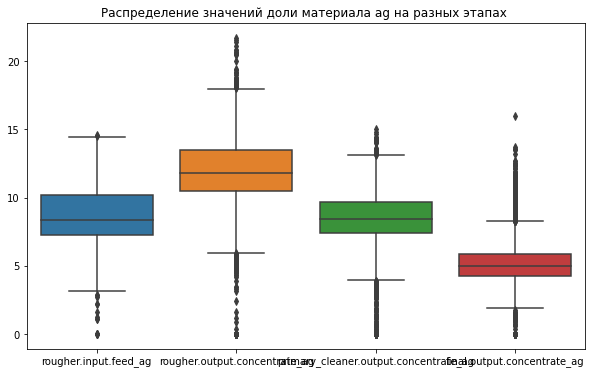

In [23]:
concentrate_ag = {'ag':['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag' ],
              }
 

 
for key in concentrate_ag:
    plt.figure(figsize=(10,6))
    sns.boxplot(data = train_data[concentrate_ag[key]])
    plt.title('Распределение значений доли материала ag на разных этапах ')
    plt.show()

Начнем с серебра: концентрация серебра на флотации начинает расти, а затем падает в финальном концентрате.

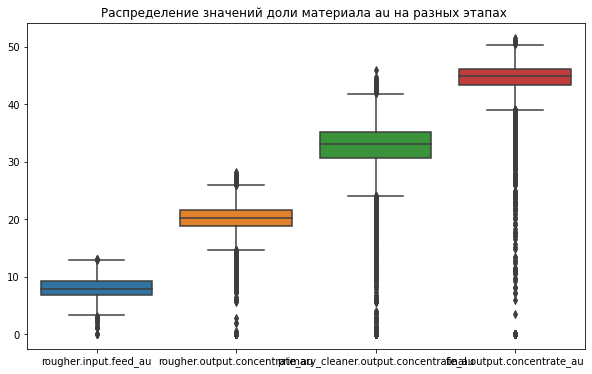

In [24]:
concentrate_au = {'au':['rougher.input.feed_au','rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au' ],
              }
 

 
for key in concentrate_au:
    plt.figure(figsize=(10,6))
    sns.boxplot(data = train_data[concentrate_au[key]])
    plt.title('Распределение значений доли материала au на разных этапах ')
    plt.show()

Концентрация золота ожидаемо растет к второму этапу очистки и получению финального концентрата.

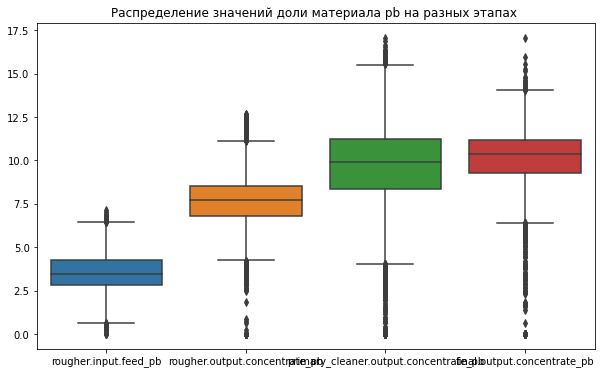

In [25]:
concentrate_pb = {'pb':['rougher.input.feed_pb','rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb' ],
              }
 

 
for key in concentrate_pb:
    plt.figure(figsize=(10,6))
    sns.boxplot(data = train_data[concentrate_pb[key]])
    plt.title('Распределение значений доли материала pb на разных этапах ')
    plt.show()

А вот концентрация свинца повышается к первому этапу очистки и остается примерно одинаковой на всех остальных этапах очистки.

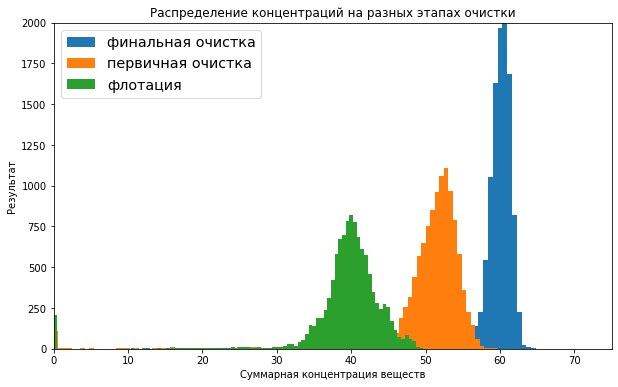

In [26]:

final_output_concentrate = (train_data['final.output.concentrate_au'] + train_data['final.output.concentrate_ag'] + train_data['final.output.concentrate_pb'] )                                   
primary_cleaner_output_concentrate = (train_data['primary_cleaner.output.concentrate_au'] + train_data['primary_cleaner.output.concentrate_ag'] + train_data['primary_cleaner.output.concentrate_pb'])
rougher_output_concentrate = (train_data['rougher.output.concentrate_au'] + train_data['rougher.output.concentrate_ag'] + train_data['rougher.output.concentrate_pb'])



plt.figure(figsize=[10,6])

plt.hist(final_output_concentrate, bins=100, label = 'финальная очистка')
plt.hist(primary_cleaner_output_concentrate, bins=100, label = 'первичная очистка')
plt.hist(rougher_output_concentrate, bins=100, label = 'флотация')

plt.xlim([0, 75])
plt.ylim([0,2000])
plt.legend(loc='upper left', fontsize='x-large')

plt.xlabel("Суммарная концентрация веществ")
plt.ylabel("Результат")


plt.title("Распределение концентраций на разных этапах очистки")
plt.show()




Суммарная концентрация веществ растет к финальной стадии очистки. Также мы видим довольно много нулевых значений, удалим их, так как нулевая суммарная концентрация веществ быть не может. Куда тогда подевались все вещества?

In [27]:
train_data = train_data.drop(train_data[train_data['primary_cleaner.output.concentrate_au'] == 0].index)


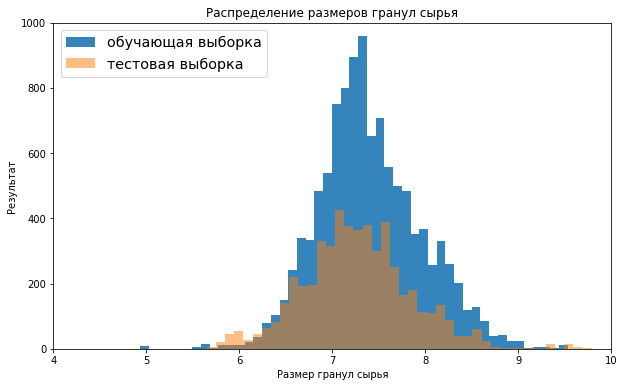

In [28]:

plt.figure(figsize=[10,6])
plt.hist(train_data['primary_cleaner.input.feed_size'], bins=100, label = 'обучающая выборка', alpha = 0.9)
plt.hist(test_data['primary_cleaner.input.feed_size'], bins=100, label = 'тестовая выборка', alpha = 0.5)


plt.xlim([4, 10])
plt.ylim([0,1000])
plt.legend(loc='upper left', fontsize='x-large')

plt.xlabel("Размер гранул сырья")
plt.ylabel("Результат")


plt.title("Распределение размеров гранул сырья")
plt.show()



Судя по всему распределение гранул сырья на обучающей и тестовой выборках похожи, различается только объем выборок. 

## Модель

Будем обучать одну модель, которая будет предсказывать два целевых признака на этапе "Флотации" целевой признак будет rougher.output.recovery, а  на финальном этапе final.output.recovery.

In [29]:
def smape (target, predictions):
    a = abs(predictions - target)
    b = (abs(target) + abs(predictions)) / 2
    summa = (a / b).sum()
    smape = (1 / len(target)) * summa * 100
    return smape

Обучим разные модели и оценим их качество кросс валидацией. выберем лучшую модель  и проверим ее на тестовой выборке. Для начала подготовим признаки для этапа флотации. Нам нужно выбрать все столбцы с началом названия rougher. Масштабировать и обучить их.

In [30]:
row_columns = test_data.columns
features_rougher = []
for column in row_columns:
    if 'rougher' in column:
        features_rougher.append(column)

train_features_rougher = train_data[features_rougher]
train_target_rougher = train_data['rougher.output.recovery']
test_features_rougher = test_data[features_rougher]
test_target_rougher = test_data['rougher.output.recovery']

In [31]:
print(train_features_rougher.shape, test_features_rougher.shape)
print(train_target_rougher.shape, test_target_rougher.shape)


(10967, 23) (5229, 23)
(10967,) (5229,)


Теперь подготовим признаки для финального этапа. Это столбцы тестовой выборки без целевых признаков (target). Масштабировать и обучить их.

In [32]:
target = ['final.output.recovery', 'rougher.output.recovery']

train_features_final = train_data[test_data.columns].drop(target, axis=1)
train_target_final = train_data['final.output.recovery']
test_features_final = test_data.drop(target, axis=1)
test_target_final = test_data['final.output.recovery']

In [33]:
print(train_features_final.shape, test_features_final.shape)
print(train_target_final.shape, test_target_final.shape)


(10967, 52) (5229, 52)
(10967,) (5229,)


In [34]:

#numeric = train_features_final.columns

scaler = StandardScaler()
scaler.fit(train_features_rougher) 
train_features_rougher = scaler.transform(train_features_rougher)
train_features_rougher = pd.DataFrame(train_features_rougher)


test_features_rougher = scaler.transform(test_features_rougher)
test_features_rougher = pd.DataFrame(test_features_rougher)





scaler = StandardScaler()
scaler.fit(train_features_final) 

train_features_final = scaler.transform(train_features_final)
train_features_final = pd.DataFrame(train_features_final)

test_features_final = scaler.transform(test_features_final)

test_features_final = pd.DataFrame(test_features_final)




Создадим функцию для оценки качества модели с помощью кросс-валидации.

In [35]:
def cross_val (model, features, target):
    scores = cross_val_score(model, features, target, scoring = make_scorer(smape, greater_is_better=True), cv=5,n_jobs=-1)
    smape_res = np.mean(scores)
    return smape_res

In [36]:
def m (model):
    
    smape_rougher = cross_val (model, train_features_final, train_target_rougher)
    smape_final = cross_val (model, train_features_final, train_target_final)
    smape_end = 0.25 * smape_rougher + 0.75 * smape_final
    print('Средняя оценка качества по кросс-валидации на этапе флотации', smape_rougher)
    print('Средняя оценка качества по кросс-валидации на финальном этапе ', smape_final)
    print('Конечная оценка качества по кросс-валидации ', smape_end)

In [37]:
model = LinearRegression()
m (model)

Средняя оценка качества по кросс-валидации на этапе флотации 11.881057966972632
Средняя оценка качества по кросс-валидации на финальном этапе  9.652551948810183
Конечная оценка качества по кросс-валидации  10.209678453350795


In [38]:
model = DecisionTreeRegressor()
m (model)

Средняя оценка качества по кросс-валидации на этапе флотации 20.166870242735605
Средняя оценка качества по кросс-валидации на финальном этапе  17.099786538587328
Конечная оценка качества по кросс-валидации  17.8665574646244


In [39]:
model = RandomForestRegressor()
m (model)

Средняя оценка качества по кросс-валидации на этапе флотации 13.917398629043143
Средняя оценка качества по кросс-валидации на финальном этапе  10.505632364751737
Конечная оценка качества по кросс-валидации  11.358573930824589


Из трех моделей лучшая оценка качества по кросс-валидации получилась у модели решающее дерево. Проверим эту модель на тестовой выборке.

In [40]:
best_smape = 10
best_depth = 0

for depth in range(1,30):
    model = DecisionTreeRegressor(max_depth=depth)
    smape_rougher = cross_val (model, train_features_final, train_target_rougher)
    smape_final = cross_val (model, train_features_final, train_target_final)
    smape_end = 0.25 * smape_rougher + 0.75 * smape_final
    if smape_end < best_smape:
        best_smape = smape_end
        best_depth = depth
print(best_smape)
print(best_depth)


9.414501590783958
1


In [42]:

def m (model):
    model_rougher = model
    model_rougher.fit(train_features_final, train_target_rougher)
    predictions_rougher =model.predict(test_features_rougher)
    
    model_final = model
    model_final.fit(train_features_final, train_target_final)
    predictions_final = model.predict(test_features_final)    


    smape_rougher = smape(train_features_final, predictions_rougher)
    smape_final = smape(test_target_final, predictions_final)
    smape_end = 0.25 * smape_rougher + 0.75 * smape_final

In [43]:

print('Средняя оценка качества по кросс-валидации на этапе флотации, модель решающее дерево', smape_rougher)
print('Средняя оценка качества по кросс-валидации на финальном этапе модель решающее дерево', smape_final)
print('Конечная оценка качества по кросс-валидации модель решающее дерево', smape_end)

Средняя оценка качества по кросс-валидации на этапе флотации, модель решающее дерево 21.330409286321366
Средняя оценка качества по кросс-валидации на финальном этапе модель решающее дерево 16.7777682285355
Конечная оценка качества по кросс-валидации модель решающее дерево 17.915928492981966


# Вывод:
Обучив разные модели и оценив качество кроссвалидацией на на тренировосной выборке, мы проверли модель на тестовой выборке. В итоге самой лучшей моделью была выбрана модель решающее дерево со значением финальной оценки качества по кросс-валидации 11.73